In [1]:
from importlib import reload
import time
import joblib
from pylab import *
from tqdm import tqdm


import sys
sys.path.append("..")

from helper_basic import *
import helper_basic as hp
import helper_finetime as hpt
import helper_visa as vs
reload(vs)
import config


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
filename = config.scope+"coincidence_preamp_v5/13_cosmic_trigger_test.joblib"


data_save=joblib.load(filename)
time_series = data_save["metadata"]["time_series"]*1e9

Text(0.5, 0, 'Time [ns]')

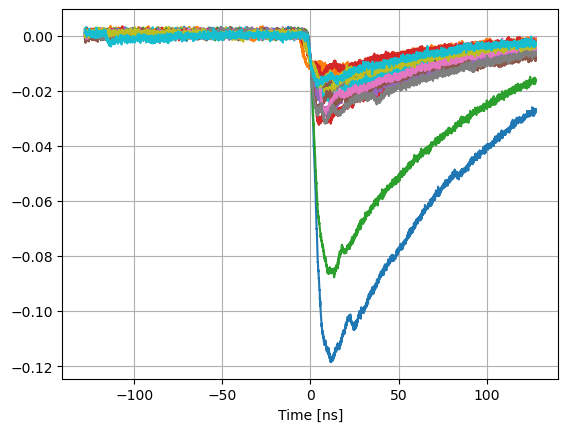

In [4]:
# Have a look at one pulse
for i in range(20):
    plot(time_series, data_save[4][i])
grid()
xlabel("Time [ns]")

132


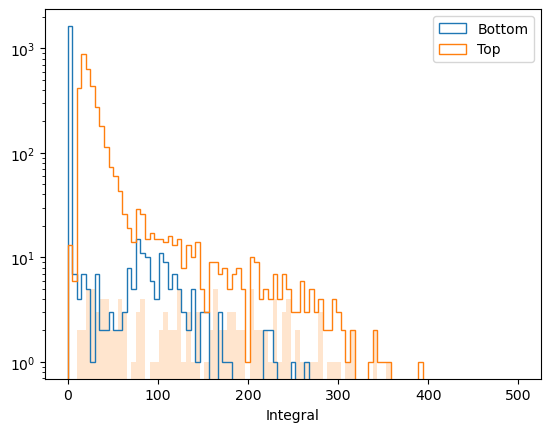

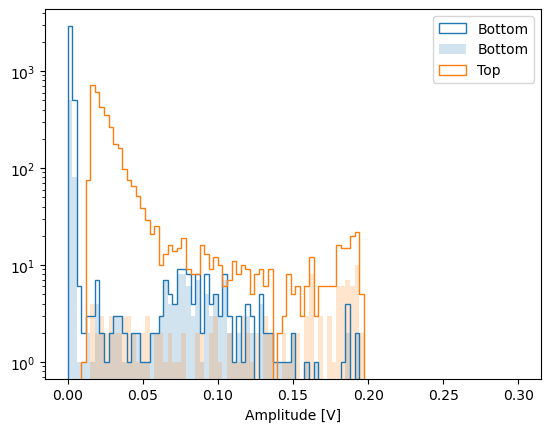

In [40]:
bins=np.linspace(0,500, 100)
integral3 = np.array([-sum(trace-np.mean(trace[:len(trace)//2])) for trace in data_save[3]])
hist(integral3, bins=bins, histtype="step", label="Bottom");

integral4 = np.array([-sum(trace-np.mean(trace[:len(trace)//2])) for trace in data_save[4]])
hist(integral4, bins=bins, histtype="step", label="Top");
hist(integral4[integral3>50], bins=bins, alpha=0.2, color="C1");


yscale("log")
print(sum(integral3>50))
xlabel("Integral")
legend()
show()


bins = np.linspace(0,0.3,100)
amp3 = np.array([-min(trace-np.mean(trace[:len(trace)//2])) for trace in data_save[3]])
amp4 = np.array([-min(trace-np.mean(trace[:len(trace)//2])) for trace in data_save[4]])


hist(amp3, bins=bins, histtype="step", label="Bottom", color="C0");
hist(amp3[amp4>0.04], bins=bins, alpha=0.2, label="Bottom", color="C0");

hist(amp4, bins=bins, histtype="step", label="Top", color="C1");
hist(amp4[integral3>50], bins=bins, alpha=0.2, color="C1");

xlabel("Amplitude [V]")
yscale("log")
legend()
show()
